# Assignement 2

This is your second assignement in the computer vision course. This time you are supposed to implement a system that outputs bounding boxes (bb) of pedestrians.

**Bounding box definition:** the smallest axis aligned rectangle containing all the pixels of the pedestrian

Ouput format:
 - A list of [frame_id, bb_id, x, y, dx, dy]. See prenom_nom.py module for an example
 
Evaluation function:
 - Detections are converted into binary masks and we calculate the following metrics: intersecion over union. Note that this metric is not sensitive to the number of bb-s. You can find the code below for the evaluation.
 - The evaluation will be performed in an independent video sequence.
 
Scoring:
 - Your work will be evaluated as usual (complexity of the solution, clean implementation, well documented) **PLUS** the best 5 will receive +1 for the grade of the assignement.
 
You have to handle in:
 - Your code that is a single python module (possibly with requirements.txt or with a dockerfile). See the example prenom_nom.py. It has to implement the same interface, if it fails to run, your solution is considered failing.
 - Your report. Short summary of your algorithm, motivation for the algorithm used, failing cases, code and results (~1 page).
 
You should send your assignment by mail to maria.vakalopoulou@centralesupelec.fr, the name of the subject of the mail should be: VIC_Assignement2_name
 

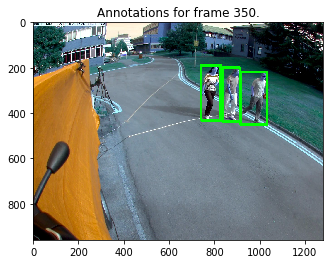

A perfect score... 1.0
A great score! 0.14770018445842967


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np
import auriauvincent

data_root = './img1/'
gt_path = './gt/gt.txt'

_W = 1280
_H = 960
_N = 684 # number of frames

def format_id(frame):
    assert _N >= frame
    return '{:03d}'.format(frame)


def read_frame(root, frame):
    """Read frames and create integer frame_id-s"""
    assert _N >= frame
    return cv2.imread(os.path.join(root,format_id(frame)+'.jpg'), cv2.IMREAD_UNCHANGED)
    

def read_gt(filename):
    """Read gt and create list of bb-s"""
    assert os.path.exists(filename)
    with open(filename, 'r') as file:
        lines = file.readlines()
    # truncate data (last columns are not needed)
    return [list(map(lambda x: int(x), line.split(',')[:6])) for line in lines]


def annotations_for_frame(solution, frame):
    assert _N >= frame
    return [bb for bb in solution if int(bb[0])==int(frame)]


def evaluate_solution(gt, solution, N):
    """Caclulate evaluation metric"""
    score = []
    #for frame in [300]:
    for frame in range(1, N):
        bbs_sol = annotations_for_frame(solution, frame)
        bbs_gt = annotations_for_frame(gt, frame)
        black_sol = np.zeros((_H, _W))
        black_gt = np.zeros((_H, _W))
        for bb in bbs_sol:
            x, y = bb[2:4]
            dx, dy = bb[4:6]
            cv2.rectangle(black_sol, (x, y), (x+dx, y+dy), (255), -1)
        for bb in bbs_gt:
            x, y = bb[2:4]
            dx, dy = bb[4:6]
            cv2.rectangle(black_gt, (x, y), (x+dx, y+dy), (255), -1)
        # intersection over union
        intersection = black_sol * black_gt
        intersection[intersection > 0.5] = 1
        union = black_sol + black_gt
        union[union > 0.5] = 1
        if not union.any():
            continue
        score.append(intersection.sum()/union.sum())
        
        
    return np.asarray(score).mean()
    

def show_annotation(solution, frame):
    assert _N >= frame
    im = read_frame(data_root, frame)
    bbs = annotations_for_frame(solution, frame)
    for bb in bbs:
        x, y = bb[2:4]
        dx, dy = bb[4:6]
        cv2.rectangle(im, (x, y), (x+dx, y+dy), (0,255,0), 10)
    plt.imshow(im)
    plt.title('Annotations for frame {}.'.format(frame))
    plt.show()
    return

gt = read_gt(gt_path)

show_annotation(gt, 350)

print('A perfect score... {}'.format(evaluate_solution(gt, gt, _N)))

# your solution will be tested simply by changing the dataset
# and changing the module, i.e., the following has to work 
# with simply using your module 
sol = auriauvincent.pedestrians('img1', _W, _H, _N)

print('A great score! {}'.format(evaluate_solution(gt, sol, _N)))



In [3]:
print(gt)

[[1, 1, 617, 128, 20, 50], [2, 1, 616, 128, 20, 50], [3, 1, 613, 127, 23, 51], [4, 1, 614, 128, 22, 51], [5, 1, 613, 128, 23, 51], [6, 1, 614, 128, 22, 51], [7, 1, 614, 128, 21, 51], [8, 1, 614, 129, 20, 51], [9, 1, 614, 130, 20, 50], [10, 1, 614, 129, 20, 51], [12, 1, 614, 128, 20, 52], [13, 1, 614, 128, 19, 52], [14, 1, 613, 128, 21, 52], [15, 1, 613, 127, 21, 54], [16, 1, 613, 128, 21, 53], [17, 1, 614, 128, 20, 53], [18, 1, 613, 128, 22, 53], [19, 1, 614, 129, 22, 52], [20, 1, 615, 129, 21, 53], [21, 1, 615, 128, 23, 53], [22, 1, 615, 129, 23, 53], [23, 1, 615, 128, 24, 53], [24, 1, 617, 127, 22, 54], [25, 1, 617, 127, 23, 54], [26, 1, 617, 128, 23, 54], [27, 1, 618, 128, 21, 54], [28, 1, 619, 128, 21, 54], [30, 1, 619, 129, 21, 54], [31, 1, 619, 128, 21, 56], [32, 1, 620, 128, 20, 56], [33, 1, 619, 129, 21, 55], [34, 1, 620, 129, 20, 55], [35, 1, 619, 129, 22, 55], [37, 1, 619, 128, 22, 56], [39, 1, 619, 129, 22, 55], [40, 1, 619, 129, 22, 56], [41, 1, 619, 128, 22, 56], [42, 1, 6

In [4]:
print(sol)

[[1, 2, 615, 133, 36, 47], [2, 2, 617, 129, 19, 24], [3, 2, 617, 128, 19, 25], [4, 2, 616, 129, 19, 24], [5, 2, 616, 130, 19, 23], [6, 2, 574, 132, 18, 23], [7, 2, 576, 132, 17, 12], [8, 2, 616, 132, 17, 12], [8, 3, 574, 132, 17, 12], [9, 2, 616, 132, 17, 12], [9, 3, 575, 132, 17, 12], [10, 2, 616, 132, 17, 12], [11, 2, 615, 131, 17, 12], [12, 2, 615, 130, 17, 12], [13, 2, 614, 130, 17, 12], [13, 3, 576, 132, 17, 12], [13, 4, 597, 130, 17, 12], [14, 2, 614, 129, 17, 12], [14, 3, 576, 132, 17, 12], [14, 4, 597, 130, 17, 12], [15, 2, 614, 129, 17, 12], [15, 3, 576, 132, 17, 12], [16, 2, 614, 129, 17, 12], [16, 3, 574, 132, 17, 12], [16, 4, 596, 130, 17, 12], [17, 2, 614, 130, 17, 12], [17, 3, 574, 132, 17, 12], [18, 2, 614, 131, 17, 12], [18, 3, 574, 132, 17, 12], [19, 2, 615, 132, 17, 12], [20, 2, 615, 133, 17, 12], [21, 2, 616, 133, 17, 12], [22, 2, 617, 131, 17, 12], [23, 2, 611, 130, 17, 12], [23, 3, 617, 130, 17, 12], [24, 2, 610, 128, 17, 12], [24, 3, 570, 130, 17, 12], [24, 4, 618